In [1]:
import os, sys

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
  sys.path.append(module_path)

from barennet.utils import Create_Similarity_Model

sns.set_style('whitegrid')
sns.set_context("talk")

2023-07-25 09:41:21.669047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-25 09:41:21.669079: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Now we will create our model

In [2]:
n_nonsimilar = 1
n_similar = 1

### We will look for similarity in the last n_similar parameters of the inputs.

## Load the MVP data for high enough Re

In [3]:
df=pd.read_excel("../../Data/Nikuradse Roughness Data/Nikuradse.xlsx")

Re = []
Friction = []
Roughness = []
possible_roughness = np.array([15, 30.6, 60, 126, 252, 507])

dic_x = {}
dic_y = {}

for i in range(len(possible_roughness)):

    possible_re = df.iloc[:, 2 * i].values
    possible_re = possible_re[np.logical_not(np.isnan(possible_re))]
    choice = possible_re > 10 ** (4)
    possible_re = possible_re[choice]

    possible_friction = df.iloc[:, (2 * i) + 1].values
    possible_friction = possible_friction[np.logical_not(np.isnan(possible_friction))]
    possible_friction = possible_friction[choice]
    
    for j in range(len(possible_re)):
        Re.append(possible_re[j])
        Friction.append(possible_friction[j])
        Roughness.append(1 / possible_roughness[i])

c = list(zip(Friction, Re, Roughness))
random.shuffle(c)
Friction, Re, Roughness = zip(*c)

Roughness = np.log(Roughness)
Re = np.log(Re)

dic_x['r/D'] = Roughness
dic_x['Re'] = Re
dic_y['f'] = Friction

nonsimilar_keys = ['r/D']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values


In [4]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 20                       # Number of model fits we will try to perform
n_epochs_initial = 100         # Number of epochs we will train inside the loop
n_epochs_final = 1000       # Number of epochs we will train after convergence is established
successfull_tries = 0

best_model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
best_model.compile(loss = loss, optimizer = optimizer)
best_model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 2)

'''while successfull_tries < 20:
    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
    model.compile(loss = loss, optimizer = optimizer)
    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
    if current_loss < 10:
        successfull_tries += 1
        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
        print(good_loss)
        if good_loss < best_loss:
            best_model = model
            best_loss = good_loss'''
    

Epoch 1/1000


2023-07-25 09:41:38.665427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-25 09:41:38.665667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-25 09:41:38.665730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-07-25 09:41:38.665783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-07-25 09:41:38.665839: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

9/9 - 0s - loss: 233.0096 - 465ms/epoch - 52ms/step
Epoch 2/1000
9/9 - 0s - loss: 226.5618 - 15ms/epoch - 2ms/step
Epoch 3/1000
9/9 - 0s - loss: 215.7203 - 16ms/epoch - 2ms/step
Epoch 4/1000
9/9 - 0s - loss: 193.2624 - 16ms/epoch - 2ms/step
Epoch 5/1000
9/9 - 0s - loss: 144.5168 - 15ms/epoch - 2ms/step
Epoch 6/1000
9/9 - 0s - loss: 59.8984 - 16ms/epoch - 2ms/step
Epoch 7/1000
9/9 - 0s - loss: 7.9764 - 15ms/epoch - 2ms/step
Epoch 8/1000
9/9 - 0s - loss: 7.6248 - 15ms/epoch - 2ms/step
Epoch 9/1000
9/9 - 0s - loss: 2.9391 - 15ms/epoch - 2ms/step
Epoch 10/1000
9/9 - 0s - loss: 2.2944 - 15ms/epoch - 2ms/step
Epoch 11/1000
9/9 - 0s - loss: 1.6608 - 13ms/epoch - 1ms/step
Epoch 12/1000
9/9 - 0s - loss: 1.3937 - 14ms/epoch - 2ms/step
Epoch 13/1000
9/9 - 0s - loss: 1.3818 - 14ms/epoch - 2ms/step
Epoch 14/1000
9/9 - 0s - loss: 1.3104 - 14ms/epoch - 2ms/step
Epoch 15/1000
9/9 - 0s - loss: 1.2792 - 14ms/epoch - 2ms/step
Epoch 16/1000
9/9 - 0s - loss: 1.2795 - 15ms/epoch - 2ms/step
Epoch 17/1000
9/9

'while successfull_tries < 20:\n    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)\n    model.compile(loss = loss, optimizer = optimizer)\n    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)\n    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)\n    if current_loss < 10:\n        successfull_tries += 1\n        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)\n        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)\n        print(good_loss)\n        if good_loss < best_loss:\n            best_model = model\n            best_loss = good_loss'

In [5]:
#best_model.fit(xtrain, ytrain, epochs = 1000, verbose = 2)
best_model.evaluate(xtrain, ytrain, verbose = 0)

0.07040833681821823

In [11]:
similarity_exponents = best_model.get_layer('similarity_layer').weights[0][0][0].numpy()
print(similarity_exponents)

multiplication_exponents = best_model.get_layer('multiplication_layer').weights[0][0].numpy()
print('Exponents multiplicating outside the function: ' + str(multiplication_exponents))

0.35857138
Exponents multiplicating outside the function: [-0.40184173]


In [107]:
scaling_factor_rd = similarity_exponents[0]
scaling_factor_f = multiplication_exponents[0]

rD__ = 1 / possible_roughness
f__ = []
re__ = []

for i in range(len(rD__)):
    f = df.iloc[:, (2 * i) + 1]
    re = df.iloc[:, 2 * i]
    f__.append(f / (re ** scaling_factor_f))
    re__.append(rD__[i] * (re ** scaling_factor_rd))

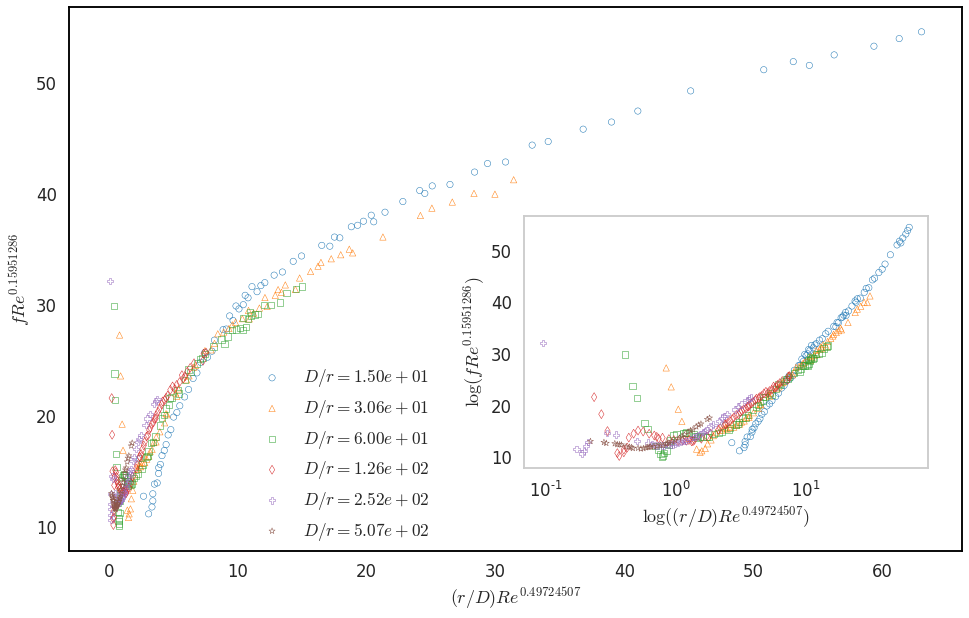

In [121]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']
line_width = 0.5

j=0
for i in range(len(rD__)):
    ax1.scatter(re__[i][:-1] , f__[i][:-1] , s=40 , linewidth = line_width , facecolors='none', color = colors[i], marker = markers[j%len(markers)], label = r'$D/r= $'+r'${:.2e}$'.format(possible_roughness[i]))
    j+=1

j=0
for i in range(len(rD__)):
    ax2.scatter(re__[i][:-1] , f__[i][:-1] , s=40 , linewidth = line_width, facecolors = 'none', color = colors[i] , marker = markers[j%len(markers)], label = r'$D/r= $'+r'${:.2e}$'.format(possible_roughness[i]))
    j+=1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',

                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0.2, 0.35), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$(r/D) Re^{" + str(similarity_exponents[0]) + r"}$")
ax1.set_ylabel(r'$f Re^{' + str(-multiplication_exponents[0]) + r'}$')
#ax1.set_ylim([2,15])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.set_xlabel(r'$\log((r/D) Re^{' + str(similarity_exponents[0]) + r'})$')
ax2.set_ylabel(r'$\log(f Re^{' + str(-multiplication_exponents[0]) + r'})$')
ax2.set_xscale('log')
#ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('BarenNet exponents for Roughness.pdf', format='pdf', dpi=1200)
plt.show()